C:\Users\PC\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Iteration: 1
Particle: 1
Validation accuracy with 68 neurons: 0.9722222222222222
Particle: 2
Validation accuracy with 97 neurons: 1.0
Particle: 3
Validation accuracy with 57 neurons: 1.0
Particle: 4
Validation accuracy with 69 neurons: 1.0
Particle: 5
Validation accuracy with 70 neurons: 0.9444444444444444
Particle: 6
Validation accuracy with 80 neurons: 0.9722222222222222
Particle: 7
Validation accuracy with 24 neurons: 1.0
Particle: 8
Validation accuracy with 98 neurons: 1.0
Particle: 9
Validation accuracy with 86 neurons: 1.0
Particle: 10
Validation accuracy with 69 neurons: 1.0
Iteration: 2
Particle: 1
Validation accuracy with 68 neurons: 0.9722222222222222
Particle: 2
Validation accuracy with 97 neurons: 1.0
Particle: 3
Validation accuracy with 97 neurons: 1.0
Particle: 4
Validation accuracy with 100 neurons: 0.9722222222222222
Particle: 5
Validation accuracy with 100 neurons: 0.9722222222222222
Particle: 6
Validation accuracy with 81 neurons: 1.0
Particle: 7
Validation accuracy w

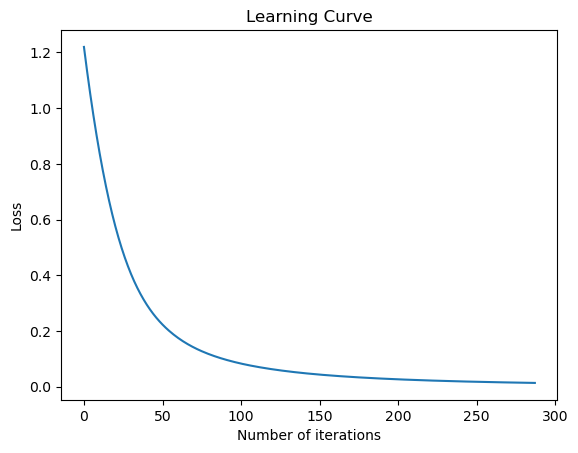

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Chargement des données
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation des données en ensembles d'entraînement, de validation et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Définition de la fonction d'évaluation (précision du modèle)
def evaluate_model(neurons):
    clf = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred)
    print("Validation accuracy with", neurons, "neurons:", val_accuracy)
    return val_accuracy

# Implémentation de l'algorithme PSO
def pso(func, num_particles, max_iter):
    num_dimensions = 1
    inertia = 0.5
    cognitive_coefficient = 1.5
    social_coefficient = 2.0
    min_val = 1
    max_val = 100

    # Initialisation des particules
    particles_position = np.random.uniform(min_val, max_val, (num_particles, num_dimensions))
    particles_velocity = np.zeros((num_particles, num_dimensions))
    particles_best_position = np.copy(particles_position)
    particles_best_score = np.zeros((num_particles,))

    global_best_position = np.zeros((1, num_dimensions))
    global_best_score = float('-inf')

    # Optimisation PSO
    for iter in range(max_iter):
        print("Iteration:", iter + 1)
        for i in range(num_particles):
            print("Particle:", i + 1)
            score = func(int(particles_position[i][0]))
            if score > particles_best_score[i]:
                particles_best_score[i] = score
                particles_best_position[i] = particles_position[i]

            if score > global_best_score:
                global_best_score = score
                global_best_position = particles_position[i]

            # Mise à jour de la vitesse et de la position
            r1 = np.random.rand(num_dimensions)
            r2 = np.random.rand(num_dimensions)
            particles_velocity[i] = (inertia * particles_velocity[i] +
                                      cognitive_coefficient * r1 * (particles_best_position[i] - particles_position[i]) +
                                      social_coefficient * r2 * (global_best_position - particles_position[i]))
            particles_position[i] += particles_velocity[i]

            # Correction des positions hors limites
            particles_position[i] = np.clip(particles_position[i], min_val, max_val)

    return global_best_position

# Recherche du nombre optimal de neurones cachés
best_neurons = pso(evaluate_model, num_particles=10, max_iter=5)
best_neurons = int(best_neurons[0])

# Entraînement du modèle avec le nombre optimal de neurones cachés
clf_final = MLPClassifier(hidden_layer_sizes=(best_neurons,), max_iter=1000, random_state=42)
clf_final.fit(X_train, y_train)

# Évaluation sur les données de test
y_pred_test = clf_final.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on test set:", test_accuracy)

# Tracé des courbes d'apprentissage
plt.plot(clf_final.loss_curve_)
plt.title('Learning Curve')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()
